⏳ Chargement des données depuis : flight_delays.csv ...
✅ Fichier chargé avec succès ! (Taille : (12, 14))

--- 🧹 Nettoyage des données ---
⚠️ 6 valeurs manquantes trouvées. Remplacement par 0...


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


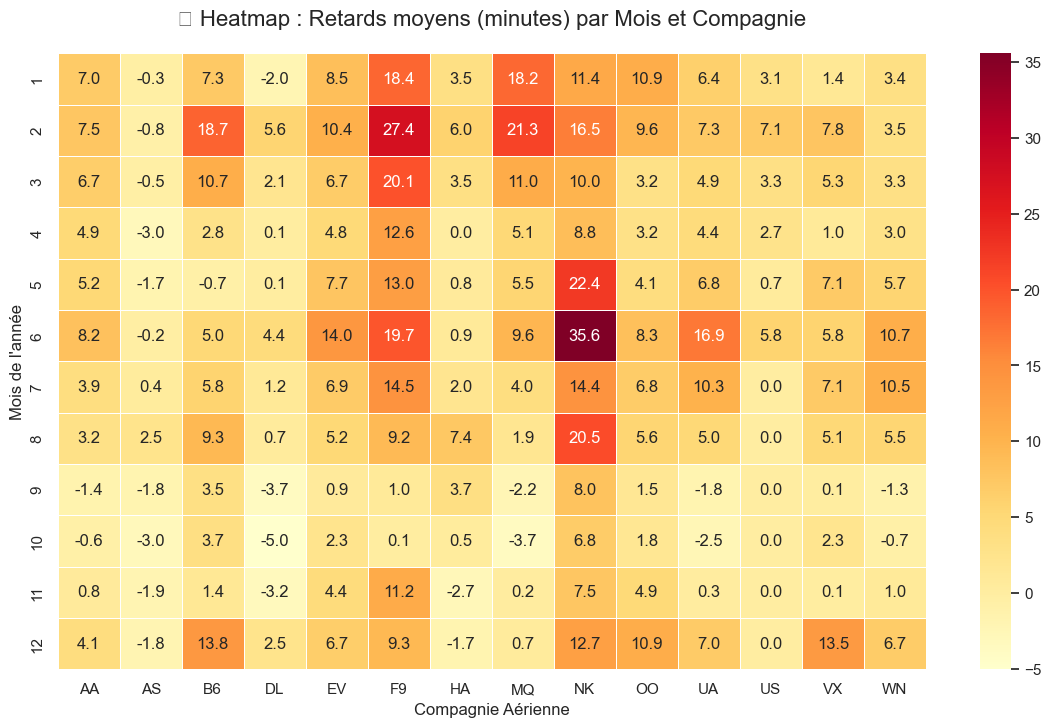

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32572\757272993.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delays.index, y=avg_delays.values, palette="rocket")
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


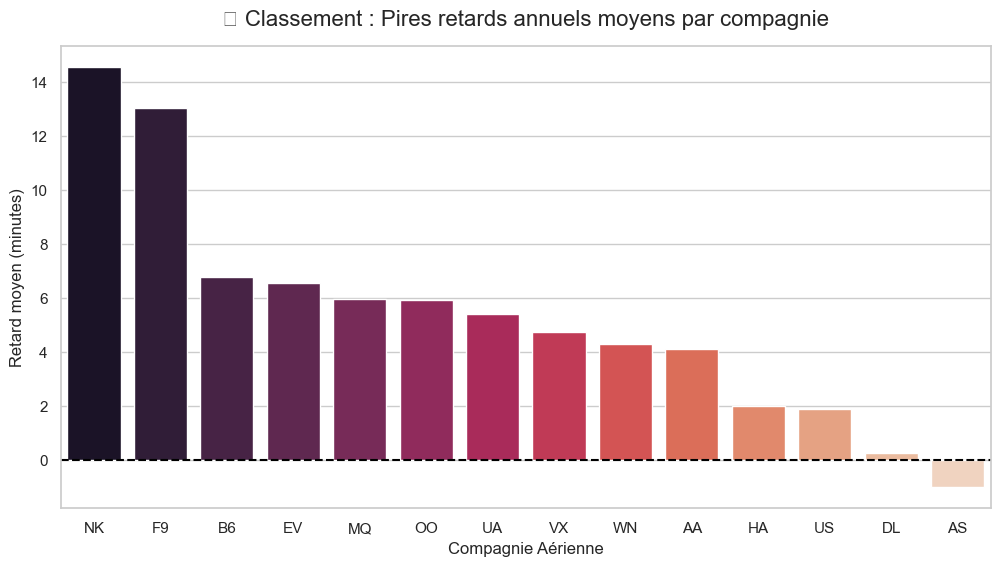

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32572\757272993.py:75: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


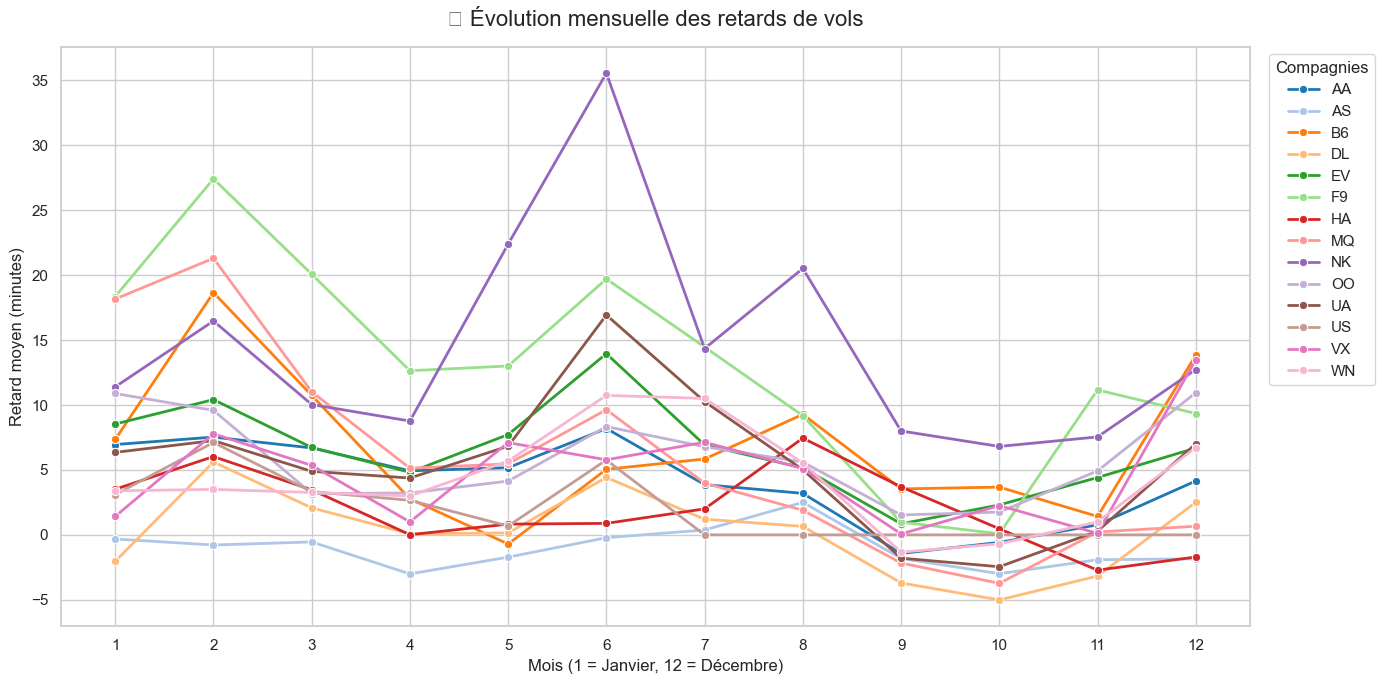

C:\Users\ASUS\AppData\Local\Temp\ipykernel_32572\757272993.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x="Airline", y="Delay", palette="pastel")
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


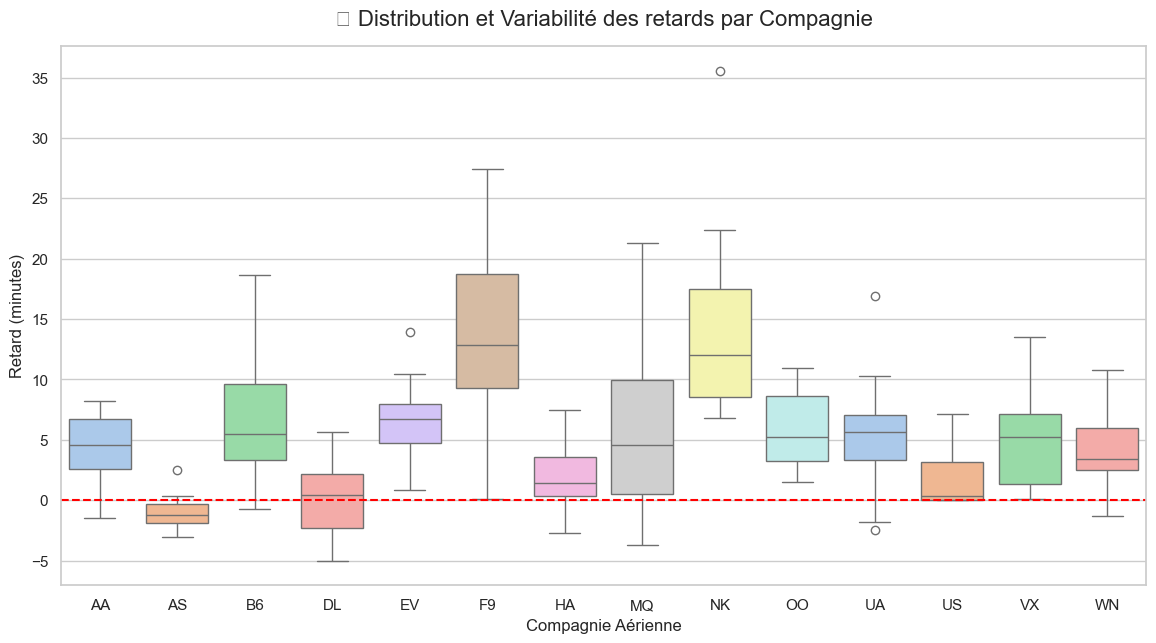

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration du style visuel
sns.set_theme(style="whitegrid")

# Chemin dynamique adaptatif (Git-Ready)
if os.path.exists("04-Logistics-Operations/flight_delays.csv"):
    file_path = "04-Logistics-Operations/flight_delays.csv"
else:
    file_path = "flight_delays.csv"

if os.path.exists(file_path):
    print(f"⏳ Chargement des données depuis : {file_path} ...")
    # On met directement le Mois en index pour faciliter les séries temporelles
    df = pd.read_csv(file_path, index_col="Month")
    print(f"✅ Fichier chargé avec succès ! (Taille : {df.shape})\n")

    # ==========================================
    # 1. NETTOYAGE ET PRÉPARATION DES DONNÉES
    # ==========================================
    print("--- 🧹 Nettoyage des données ---")
    
    # Remplacer les potentielles valeurs manquantes par 0 (On part du principe que pas de donnée = pas de retard)
    missing_values = df.isnull().sum().sum()
    if missing_values > 0:
        print(f"⚠️ {missing_values} valeurs manquantes trouvées. Remplacement par 0...")
        df.fillna(0, inplace=True)
    else:
        print("✅ Aucune valeur manquante détectée.")

    # Transformation avancée (Melt) : Transforme les colonnes de compagnies en lignes
    # Idéal pour utiliser l'argument 'hue' dans Seaborn
    df_long = df.reset_index().melt(id_vars="Month", var_name="Airline", value_name="Delay")

    # ==========================================
    # 2. VISUALISATIONS AVANCÉES
    # ==========================================

    # --- GRAPHIQUE 1 : Heatmap des Retards (Vue d'ensemble) ---
    plt.figure(figsize=(14, 8))
    # Une palette YlOrRd (Jaune-Orange-Rouge) est parfaite pour alerter sur les retards
    sns.heatmap(data=df, annot=True, cmap="YlOrRd", fmt=".1f", linewidths=.5)
    plt.title("🔥 Heatmap : Retards moyens (minutes) par Mois et Compagnie", fontsize=16, pad=20)
    plt.xlabel("Compagnie Aérienne", fontsize=12)
    plt.ylabel("Mois de l'année", fontsize=12)
    plt.show()

    # --- GRAPHIQUE 2 : Classement des pires compagnies (Barplot) ---
    plt.figure(figsize=(12, 6))
    # Calcul de la moyenne annuelle par compagnie et tri
    avg_delays = df.mean().sort_values(ascending=False)
    
    sns.barplot(x=avg_delays.index, y=avg_delays.values, palette="rocket")
    plt.title("🏆 Classement : Pires retards annuels moyens par compagnie", fontsize=16, pad=15)
    plt.xlabel("Compagnie Aérienne", fontsize=12)
    plt.ylabel("Retard moyen (minutes)", fontsize=12)
    
    # Ligne de référence à 0 (Les valeurs négatives signifient que les vols étaient en avance)
    plt.axhline(0, color='black', linewidth=1.5, linestyle='--')
    plt.show()

    # --- GRAPHIQUE 3 : Évolution des retards sur l'année (Lineplot Global) ---
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df_long, x="Month", y="Delay", hue="Airline", marker="o", palette="tab20", linewidth=2)
    plt.title("📈 Évolution mensuelle des retards de vols", fontsize=16, pad=15)
    plt.xlabel("Mois (1 = Janvier, 12 = Décembre)", fontsize=12)
    plt.ylabel("Retard moyen (minutes)", fontsize=12)
    plt.xticks(range(1, 13)) # Force l'axe X à afficher tous les mois proprement
    
    # Sortir la légende du graphique pour ne pas cacher les lignes
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title="Compagnies")
    plt.tight_layout()
    plt.show()

    # --- GRAPHIQUE 4 : Distribution et Variabilité (Boxplot) ---
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=df_long, x="Airline", y="Delay", palette="pastel")
    plt.title("📦 Distribution et Variabilité des retards par Compagnie", fontsize=16, pad=15)
    plt.xlabel("Compagnie Aérienne", fontsize=12)
    plt.ylabel("Retard (minutes)", fontsize=12)
    
    # Ligne rouge de référence (zéro retard)
    plt.axhline(0, color='red', linestyle='--', linewidth=1.5)
    plt.show()

else:
    print("❌ Erreur : Impossible de trouver le fichier CSV. Vérifie l'arborescence du projet.")

⏳ Chargement des données depuis : flight_delays.csv ...
✅ Fichier chargé avec succès ! (Taille : (12, 14))



C:\Users\ASUS\AppData\Local\Temp\ipykernel_32572\435373507.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.read_csv(file_path , index_col="Month", parse_dates=True)


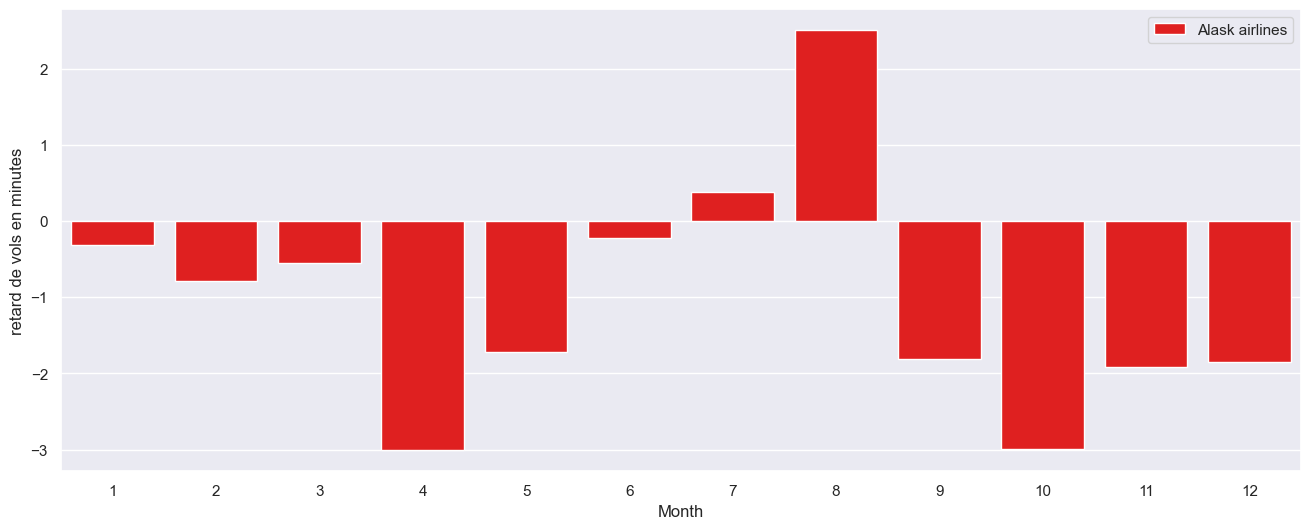

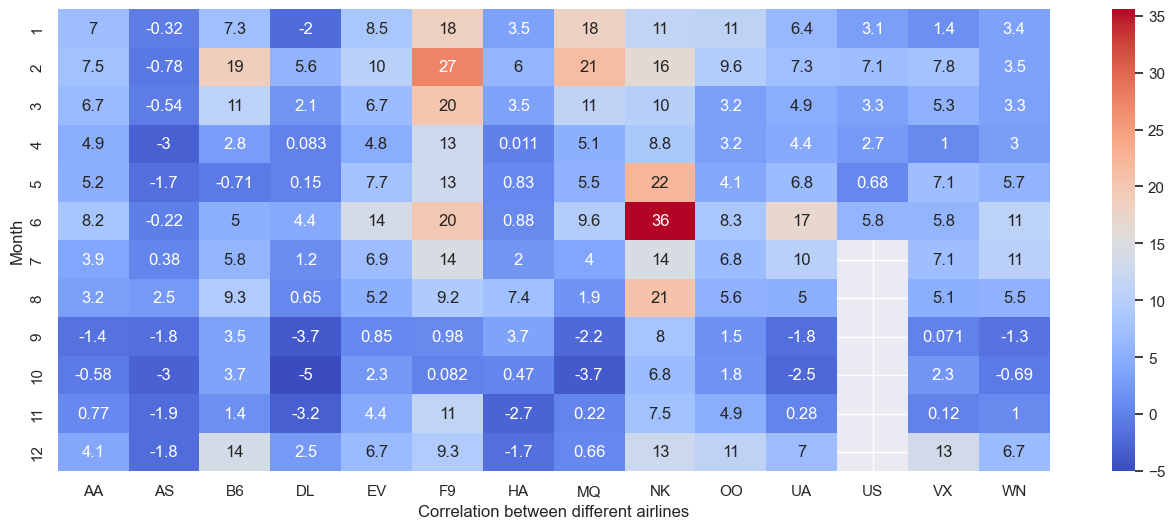

In [2]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")

# Chemin dynamique adaptatif (Git-Ready)
if os.path.exists("04-Logistics-Operations/flight_delays.csv"):
    file_path = "04-Logistics-Operations/flight_delays.csv"
else:
    file_path = "flight_delays.csv"

if os.path.exists(file_path):
    print(f"⏳ Chargement des données depuis : {file_path} ...")
    # On met directement le Mois en index pour faciliter les séries temporelles
    df = pd.read_csv(file_path, index_col="Month")
    print(f"✅ Fichier chargé avec succès ! (Taille : {df.shape})\n")

data=pd.DataFrame()
data=pd.read_csv(file_path , index_col="Month", parse_dates=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(16,6))
sns.barplot(x=data.index , y=data['AS'] , color='red' , label='Alask airlines' )
plt.ylabel("retard de vols en minutes")
plt.show()
plt.figure(figsize=(16,6))
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.xlabel("Correlation between different airlines")
plt.show()
#df is your dataframe
